In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Jamboree.csv')

In [ ]:
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
495         1              0.87  
496         1              0.96  
497         1              0.93  
498         0              0.73  
499         0              0.84  

[500 rows x 9 columns]

# **Q1 Problem statement:**
Perform exploratory data analysis on jamboree education dataset to derive valuable insights.


From given dataset build lineare regression model to predict the candidates chances of admission.


Dataset contains information on candidates GRE score, TOEFL score, University rating, statement of purpose rating, letter of reccomondation rating, CGPA, research experience of candidate and chances of admission.






In [ ]:
 # Shape of dataset

 df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in entire dataset.

In [ ]:
df.duplicated().any()

np.False_

There are no duplicate records in entire dataset.

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Serial number column is not required as this column won't have any effect on candidates chances of admission, so we will drop this column.

In [ ]:
df.drop('Serial No.',axis = 1, inplace = True)

In [ ]:
# checking datatype of each column.

df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
# Statistical summary of dataset

df.describe()

GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.560000    1.000000           0.72000  
75%      9.040000    1.000000           0.82000  
max      9.920000    1.000000           0.97000

Above table shows the minimum, maximum, mean, median, standard deviation values of each column.

# **Q3 Data Visualisation**

a. Univariate analysis


b. Bivariate analysis

# **a. Univariate analysis**

In [ ]:
# Checking the distribution of each continuous column.

df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

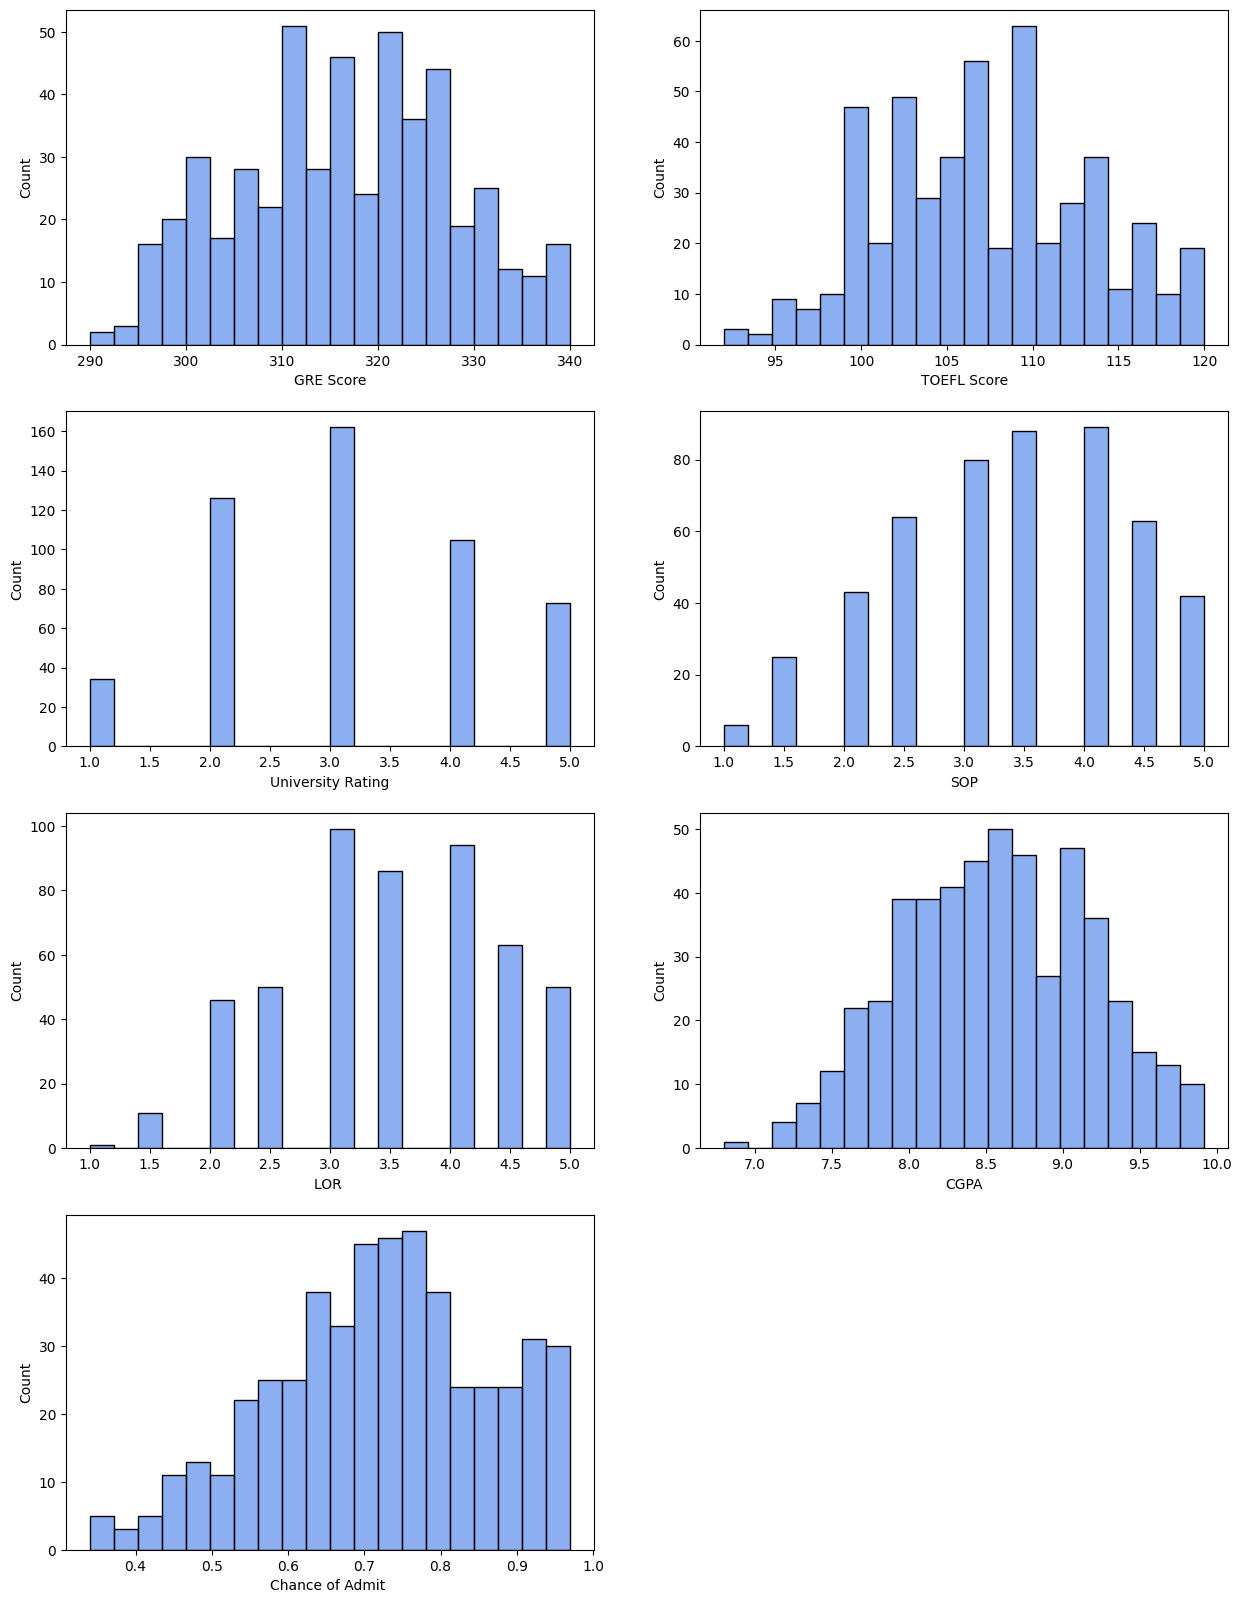

In [ ]:
cont_clm = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Chance of Admit ']
plt.figure(figsize=(15,20))
for i in range(len(cont_clm)):
  plt.subplot(4,2,i+1)
  sns.histplot(df[cont_clm[i]],color='cornflowerblue', bins= 20)
plt.show()


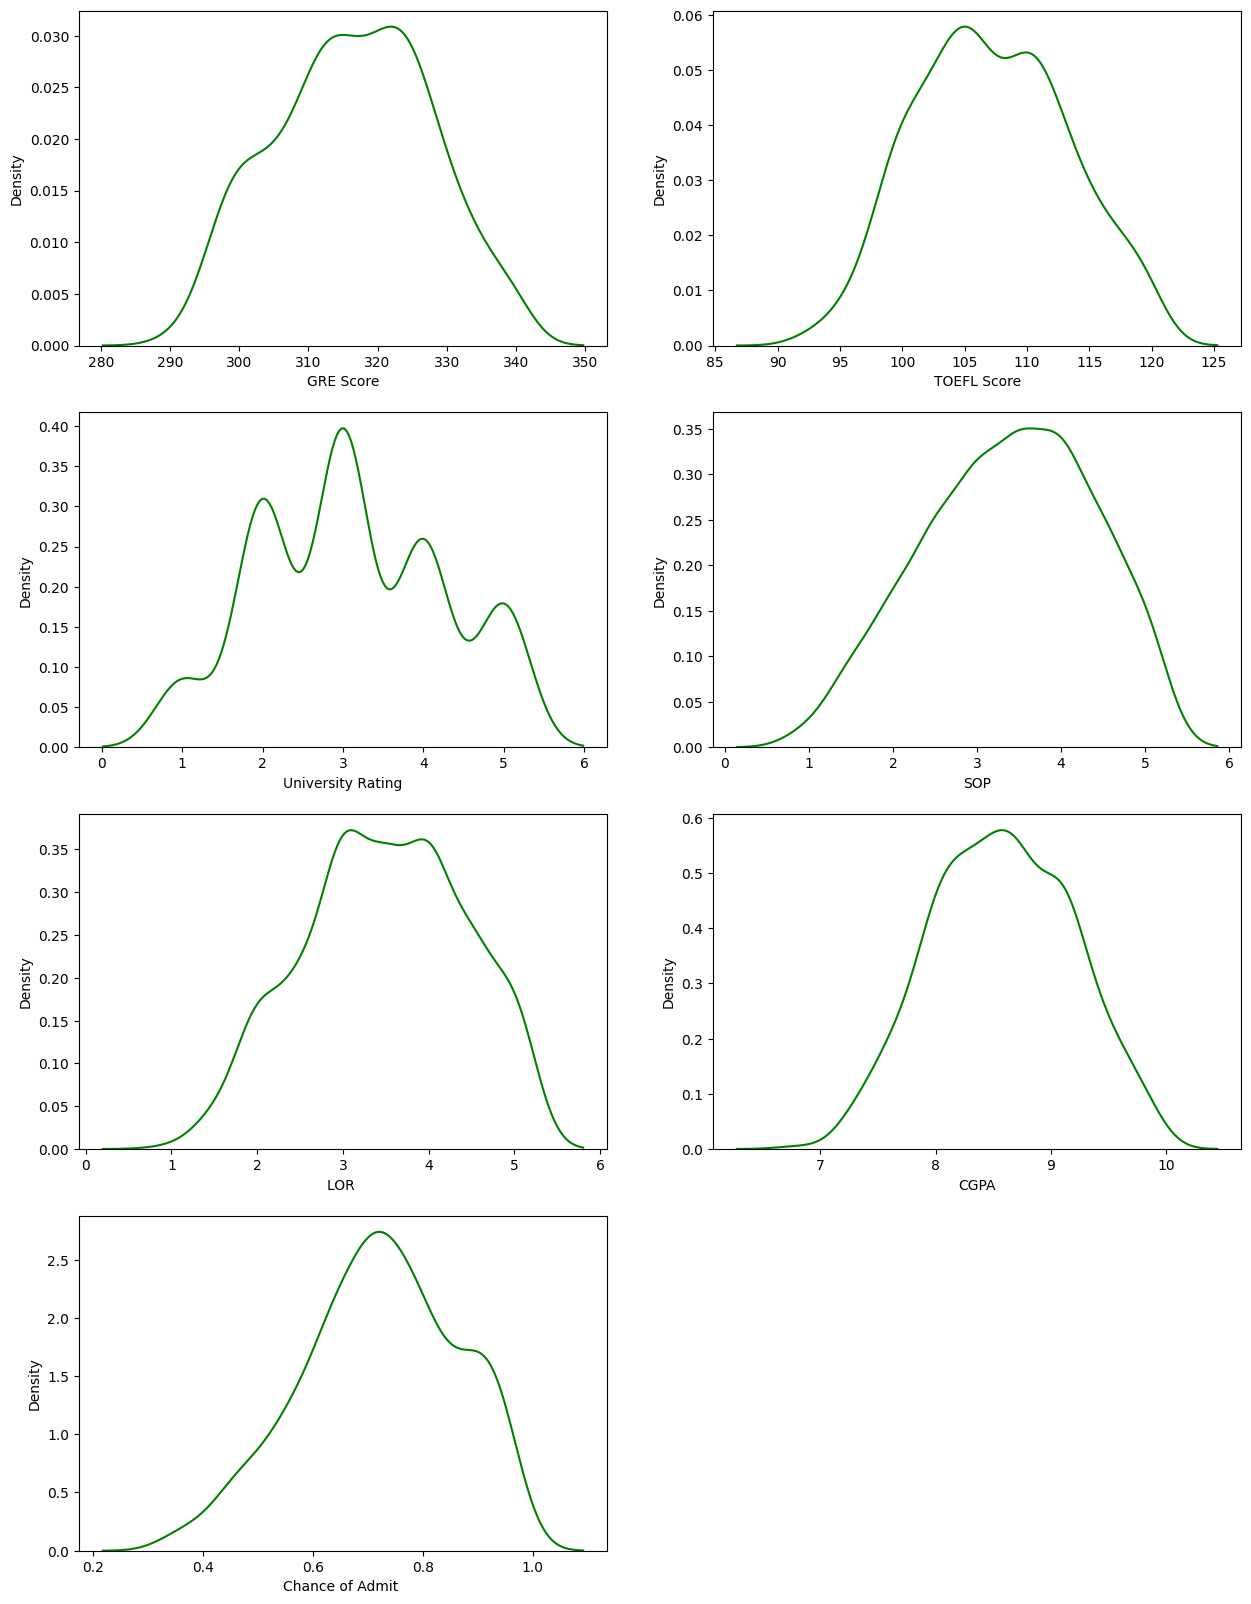

In [ ]:
cont_clm = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Chance of Admit ']
plt.figure(figsize=(15,20))
for i in range(len(cont_clm)):
  plt.subplot(4,2,i+1)
  sns.kdeplot(df[cont_clm[i]],color='green')
plt.show()

Insights:
1. GRE score - GRE score is normally distributed.
2. TOEFEL score is also normally distributed.
3. University rating score is normally distributed.
4. Statement of purpose rating follows normal distribution with slight skewness towards left.
5. Letter of recommondation rating and CGPA follows normal dustribution.
6. Chances of admit follows normal distribution with slight skewness towards left.

Research
1    280
0    220
Name: count, dtype: int64


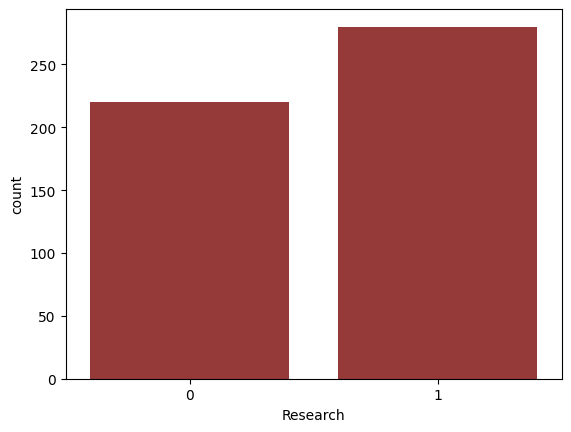

In [ ]:
print(df['Research'].value_counts())

sns.countplot(x=df['Research'], color = 'Brown')
plt.show()

Conclusion:
Therefore there are more number of students with research experience that students with no reaearch experience.

# **b. Bivariate & Multivariate analysis.**

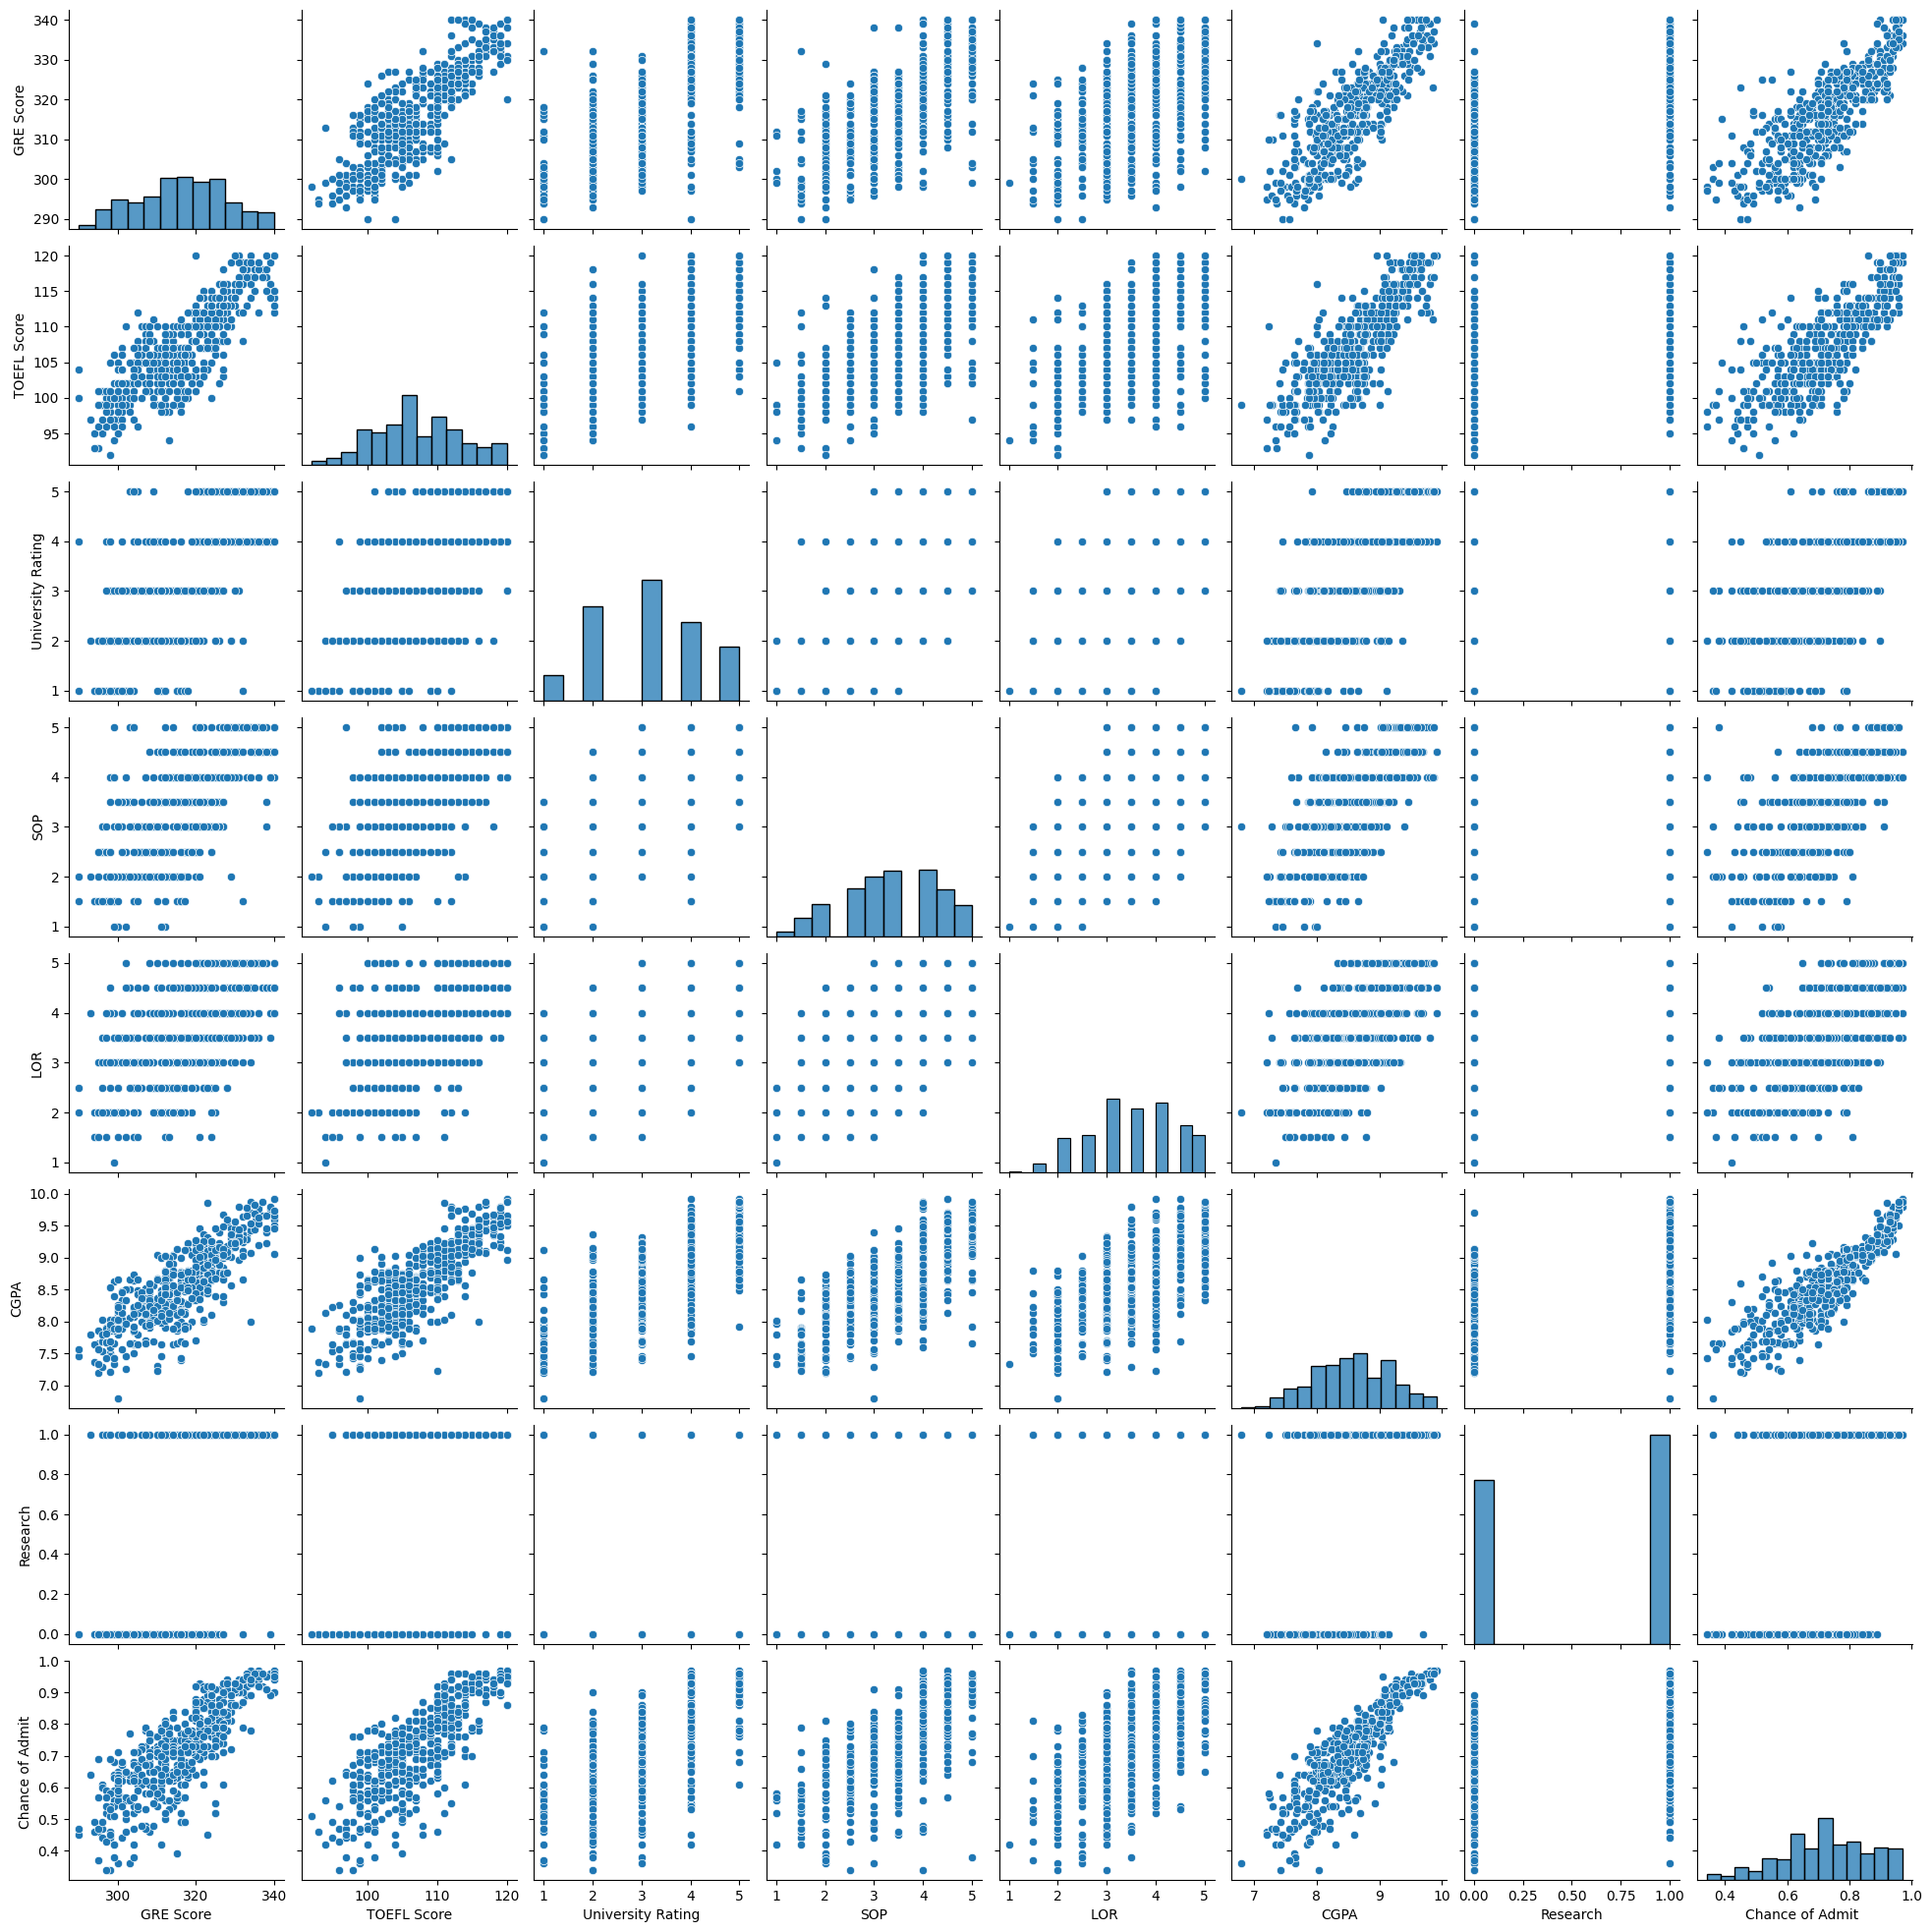

In [ ]:
sns.pairplot(df)
plt.show()

Conclusion:

1. GRE score has positive correlation between TOEFL score and chances of admission.
2. Chances of admission has positive correlation with GRE score, TOEFL score & CGPA.

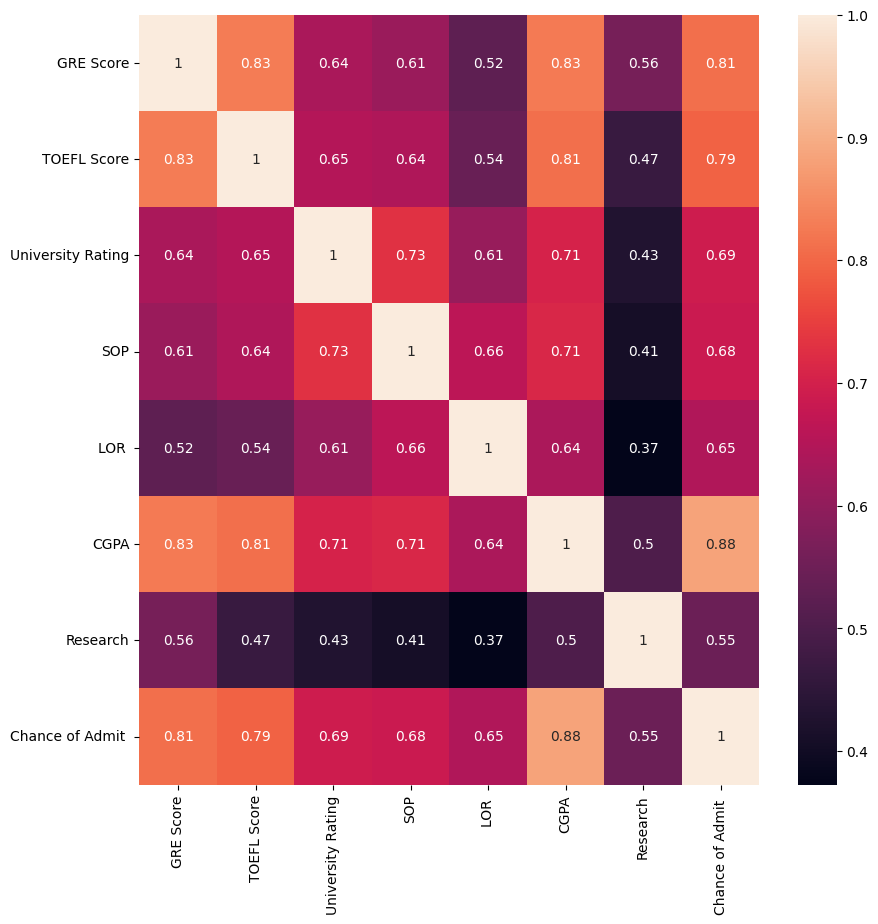

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Conclusion:

1. From correlation values we can say that all the features are having positive correlation with each other
2. All the correlation values are less than 0.9 so we will not drop any features.

# **Data processing.**

There are no duplicates and missing records in dataset however we will check if any column contains outliers by plotting boxplots.

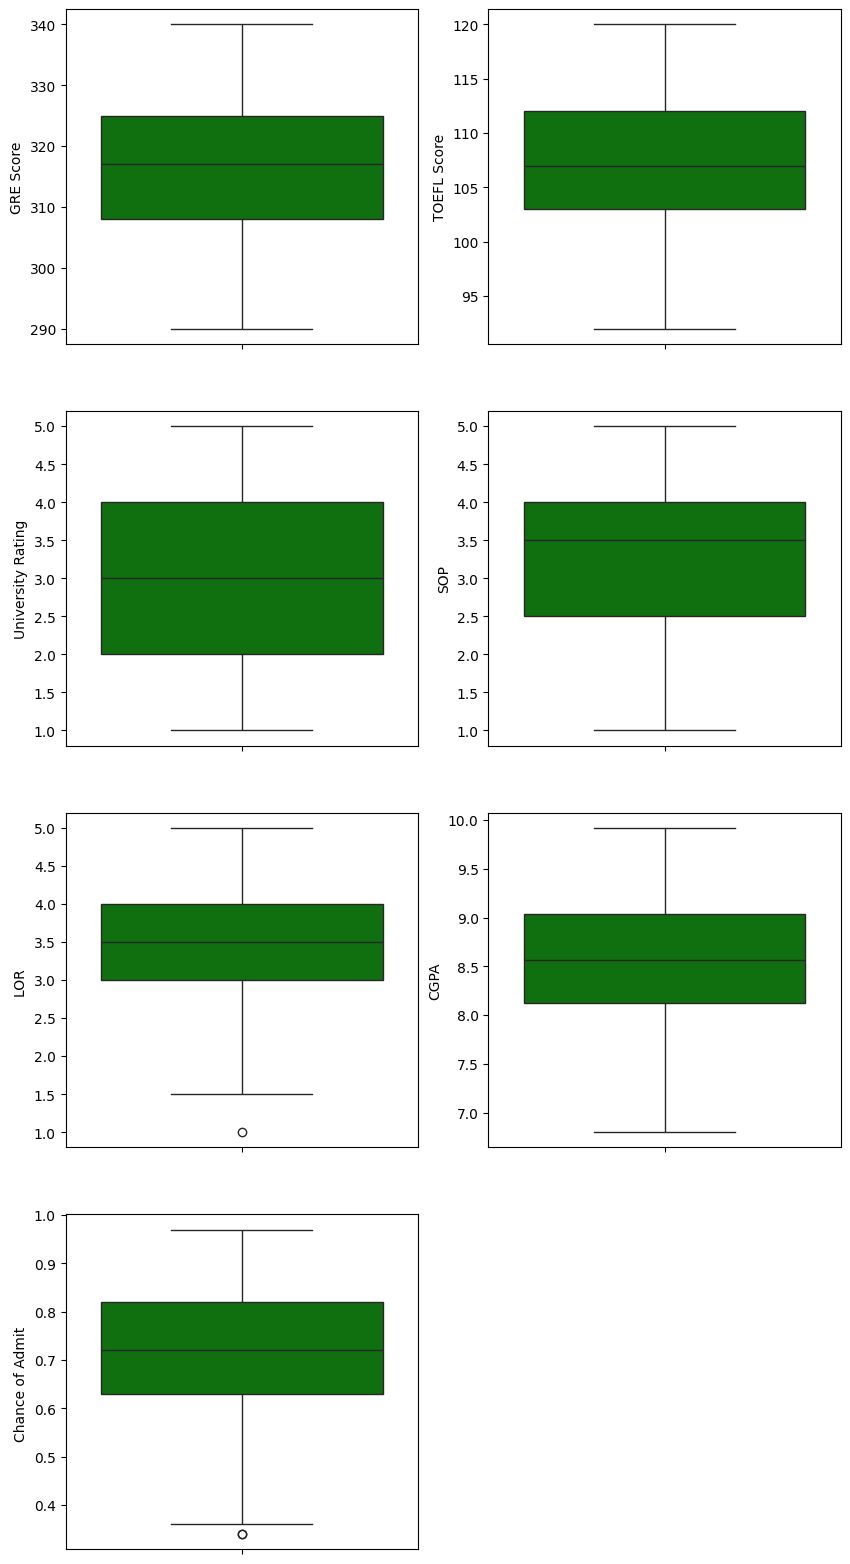

In [ ]:
cont_clm = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Chance of Admit ']
plt.figure(figsize=(10,20))
for i in range(len(cont_clm)):
  plt.subplot(4,2,i+1)
  sns.boxplot(df[cont_clm[i]],color='green')
plt.show()

In [ ]:
df

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
495              0.87  
496              0.96  
497              0.93  
498              0.73  
499              0.84  

[500 rows x 8 columns]

In [ ]:
df.rename({'LOR ':'LOR'},axis=1, inplace = True)

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

There are some outliers in letter of reccomondation rating and chances of admission. We will remove these ouliers by IQR method.

In [ ]:
# 1. removing outliers in LOR.

q1= np.percentile(df['LOR'],25)
q3= np.percentile(df['LOR'],75)
IQR = q3-q1
LW = q1-1.5*IQR
UW = q3+1.5*IQR
df_clean0= df[(df['LOR']>LW) & (df['LOR']<UW)]

In [ ]:
df_clean0

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0          337          118                  4  4.5  4.5  9.65         1   
1          324          107                  4  4.0  4.5  8.87         1   
2          316          104                  3  3.0  3.5  8.00         1   
3          322          110                  3  3.5  2.5  8.67         1   
4          314          103                  2  2.0  3.0  8.21         0   
..         ...          ...                ...  ...  ...   ...       ...   
495        332          108                  5  4.5  4.0  9.02         1   
496        337          117                  5  5.0  5.0  9.87         1   
497        330          120                  5  4.5  5.0  9.56         1   
498        312          103                  4  4.0  5.0  8.43         0   
499        327          113                  4  4.5  4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
495              0.87  
496              0.96  
497              0.93  
498              0.73  
499              0.84  

[488 rows x 8 columns]

In [ ]:
df_clean0.rename({'Chance of Admit ':'Chance of Admit' },axis=1, inplace = True)

<ipython-input-68-6b9414af6b00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean0.rename({'Chance of Admit ':'Chance of Admit' },axis=1, inplace = True)


In [ ]:
df_clean0.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
# 1. removing outliers in chances of admission.

q1= np.percentile(df_clean0['Chance of Admit'],25)
q3= np.percentile(df_clean0['Chance of Admit'],75)
IQR = q3-q1
LW = q1-1.5*IQR
UW = q3+1.5*IQR
df_clean= df_clean0[(df_clean0['Chance of Admit']>LW) & (df_clean0['Chance of Admit']<UW)]

In [ ]:
df_clean

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0          337          118                  4  4.5  4.5  9.65         1   
1          324          107                  4  4.0  4.5  8.87         1   
2          316          104                  3  3.0  3.5  8.00         1   
3          322          110                  3  3.5  2.5  8.67         1   
4          314          103                  2  2.0  3.0  8.21         0   
..         ...          ...                ...  ...  ...   ...       ...   
495        332          108                  5  4.5  4.0  9.02         1   
496        337          117                  5  5.0  5.0  9.87         1   
497        330          120                  5  4.5  5.0  9.56         1   
498        312          103                  4  4.0  5.0  8.43         0   
499        327          113                  4  4.5  4.5  9.04         0   

     Chance of Admit  
0               0.92  
1               0.76  
2               0.72  
3               0.80  
4               0.65  
..               ...  
495             0.87  
496             0.96  
497             0.93  
498             0.73  
499             0.84  

[486 rows x 8 columns]

Q5 Correlation matrix

In [ ]:
corr = df_clean.corr()
corr

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.823522           0.622924  0.612628   
TOEFL Score         0.823522     1.000000           0.637739  0.639901   
University Rating   0.622924     0.637739           1.000000  0.719924   
SOP                 0.612628     0.639901           0.719924  1.000000   
LOR                 0.509285     0.518834           0.584528  0.650051   
CGPA                0.820842     0.808109           0.693350  0.709021   
Research            0.557401     0.460643           0.415942  0.404728   
Chance of Admit     0.803190     0.785730           0.678076  0.686732   

                        LOR      CGPA  Research  Chance of Admit  
GRE Score          0.509285  0.820842  0.557401         0.803190  
TOEFL Score        0.518834  0.808109  0.460643         0.785730  
University Rating  0.584528  0.693350  0.415942         0.678076  
SOP                0.650051  0.709021  0.404728         0.686732  
LOR                1.000000  0.626667  0.362204         0.629483  
CGPA               0.626667  1.000000  0.490276         0.882150  
Research           0.362204  0.490276  1.000000         0.539970  
Chance of Admit    0.629483  0.882150  0.539970         1.000000

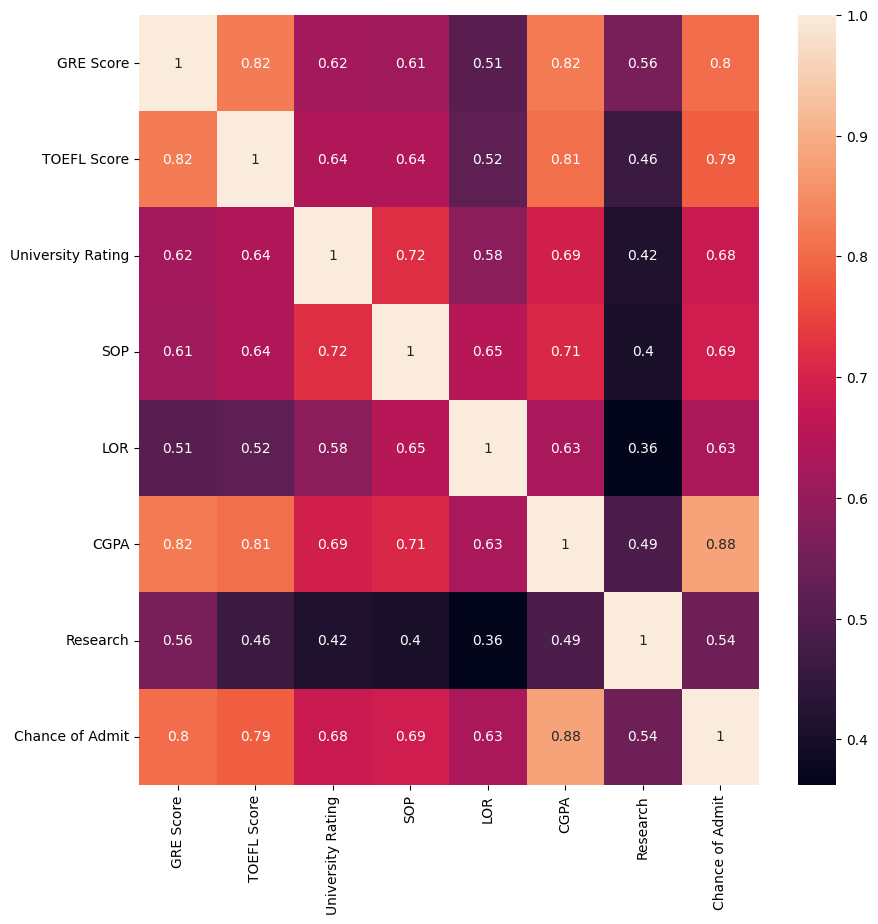

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

Conclusion:

All the correlation values are less than 0.9 therefore we will not drop any columns from dataset.


Chances of admission has very high correlation with CGPA and GRE Score & least correlation with research experince.

In [ ]:
df_clean=df_clean.reset_index(drop=True)
df_clean

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0          337          118                  4  4.5  4.5  9.65         1   
1          324          107                  4  4.0  4.5  8.87         1   
2          316          104                  3  3.0  3.5  8.00         1   
3          322          110                  3  3.5  2.5  8.67         1   
4          314          103                  2  2.0  3.0  8.21         0   
..         ...          ...                ...  ...  ...   ...       ...   
481        332          108                  5  4.5  4.0  9.02         1   
482        337          117                  5  5.0  5.0  9.87         1   
483        330          120                  5  4.5  5.0  9.56         1   
484        312          103                  4  4.0  5.0  8.43         0   
485        327          113                  4  4.5  4.5  9.04         0   

     Chance of Admit  
0               0.92  
1               0.76  
2               0.72  
3               0.80  
4               0.65  
..               ...  
481             0.87  
482             0.96  
483             0.93  
484             0.73  
485             0.84  

[486 rows x 8 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# splitting data:

xtrain,xtest=train_test_split(df_clean,test_size=0.25,random_state=1)

In [ ]:
# Standardizing data to have less variability & equal range.

scaler = StandardScaler()
xtrain_sc= pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest_sc= pd.DataFrame(scaler.fit_transform(xtest),columns=xtest.columns)

In [ ]:
ytn= xtrain['Chance of Admit'].reset_index(drop=True)
xtn = xtrain_sc.drop('Chance of Admit',axis=1).reset_index(drop=True)
ytt= xtest['Chance of Admit'].reset_index(drop=True)
xtt = xtest_sc.drop('Chance of Admit',axis=1).reset_index(drop=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
# Lineare regression model:

xtn_with_constant= sm.add_constant(xtn)
xtt_with_constant= sm.add_constant(xtt)

lr_model = sm.OLS(ytn,xtn_with_constant).fit()

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     248.3
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          8.53e-133
Time:                        07:17:42   Log-Likelihood:                 520.00
No. Observations:                 364   AIC:                            -1024.
Df Residuals:                     356   BIC:                            -992.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7292      0.00

1. Rsquare of above model is 0.83 and adjusted rsquare is 0.827.
2. Above table shows the coefficients/weights of each feature, CGPA column has highest weight(0.0765) followed by GRE score (0.0201). University rating & statement of purpose has least weights (0.0011 & 0.0077).
2. Two coulmns university rating and statement of purpose rating have pvalue more that 0.05 which tells that effect of change in university rating and statement of purpose rating has statistically no effect on chances of admission, therefore we can remove these two columns and retrain the model for another features.

In [ ]:
xtn_with_constant.columns

Index(['const', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research'],
      dtype='object')

In [164]:
# Lineare regression model for features other than university rating and statement of purpose rating.

xtn_with_constant2= xtn_with_constant[['const','GRE Score','TOEFL Score','LOR','CGPA','Research']]
xtt_with_constant2= xtt_with_constant[['const','GRE Score','TOEFL Score','LOR','CGPA','Research']]

lr_model2 = sm.OLS(ytn, xtn_with_constant2).fit()

print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     346.1
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          1.07e-134
Time:                        10:28:52   Log-Likelihood:                 518.49
No. Observations:                 364   AIC:                            -1025.
Df Residuals:                     358   BIC:                            -1002.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7292      0.003    236.946      

Observations:

1. Rsquare of retrained model is 0.829 and adjusted Rsquare is 0.826.
2. CGPA & GRE score have the highest weights which suggest that effect GRE score and CGPA on target vaiable(chances of admission) is more than other features. Research column has least weight which means that chances of admission is not much affected by research column.
3. P value of all the columns is less than 0.05 so we will not drop any column. As p value is less than 0.05 so effect of changes in all features on target variable is statistically significant.

# **Check of assumptions of lineare regression:**
1. Linearity.
2. No multicollinearity.
3. Errors should be normally distributed.
4. No heteroscedasticity.
5. No autocorrelation.

In [139]:
# 1. Linearity
features = ['GRE Score','TOEFL Score','LOR','CGPA','Research']
f_corr = pd.DataFrame()
f_corr['Feature'] = features
f_corr['Corr_value'] = [xtn_with_constant2[i].corr(ytn) for i in features]
f_corr

Feature  Corr_value
0    GRE Score    0.811203
1  TOEFL Score    0.800193
2          LOR    0.632705
3         CGPA    0.892490
4     Research    0.537365

From the above table we can see that all the features have lineare relationship with target variable therefore train data satisfies first assumption of lineare regression.

In [162]:
# 2. No multicollinearity

VIF = pd.DataFrame()
VIF['Feature']=xtn_with_constant2.columns
VIF['VIF']= [variance_inflation_factor(xtn_with_constant2,i) for i in range(xtn_with_constant2.shape[1])]
VIF = VIF.sort_values(by='VIF', ascending = False)
VIF

Feature       VIF
4         CGPA  4.727135
1    GRE Score  4.406684
2  TOEFL Score  4.045172
3          LOR  1.670647
5     Research  1.480120
0        const  1.000000

Conclusion:


All the VIF values are less than 5 so we can keep all the features.


We will remove features whose VIF value is more than 10.


As all the vIF values are less than 5 so we can say that multicollinearity don't exist in train data.

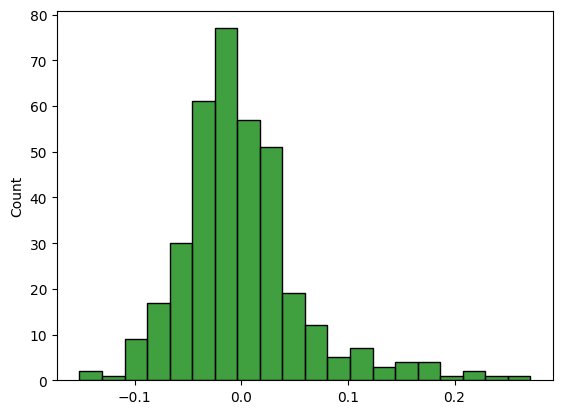

In [176]:
# 3. Mean square error should be normally distributed.
y_hat = lr_model2.predict(xtn_with_constant2)
error = (y_hat-ytn)
sns.histplot(error,color='green',bins=20)
plt.show()

Conclusion:

From the histogram we can see that errors are normally distributed so assumption of normal distribution of errors is also satisfied.

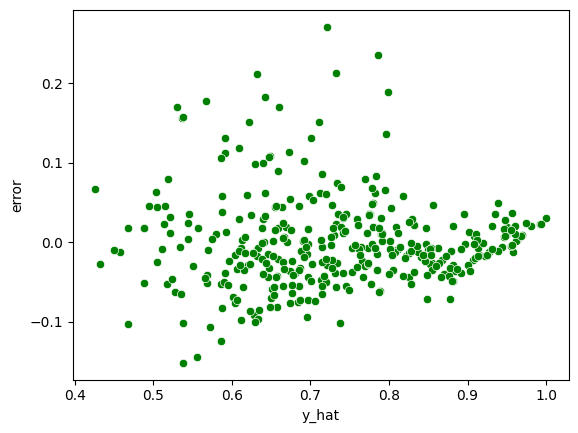

In [179]:
# 4. No heteroskedasticity
sns.scatterplot(x=y_hat,y=error,color='green')
plt.xlabel('y_hat')
plt.ylabel('error')
plt.show()

Conclusion:

From the scatterplot we can say that there is no heteroskedasticity in data.

In [188]:
# Testing assumption of homoskedasticity by goldfeldquandt test:
# Null hypothesis : Heteroskedasticity does not exist in data.
# Alternate hypothesis : Heteroskedasticity exist in data.
# Significance level: 0.05

import statsmodels.stats.api as sms
f_statistic, p_value, o = sms.het_goldfeldquandt(ytn,xtn_with_constant2)
print(p_value)

0.9969776165007211


Conclusion:


As p value is more than significance level so we failed to reject the null hypothesis. Therefore there is no heterskedasticity in training data.

In [189]:
# 5. Assumption of autocorrelation:
# Assumption of autocorrelation is applicable to timeseries data & our data is not time series data so assumption of autocorrelation is not applicable

In [190]:
# Running the model on test data to predict the chances of admission

y_hat_p = lr_model2.predict(xtt_with_constant2)
y_hat_p

0      0.924961
1      0.913957
2      0.634270
3      0.638579
4      0.674050
         ...   
117    0.669918
118    0.709897
119    0.539940
120    1.025060
121    0.549860
Length: 122, dtype: float64

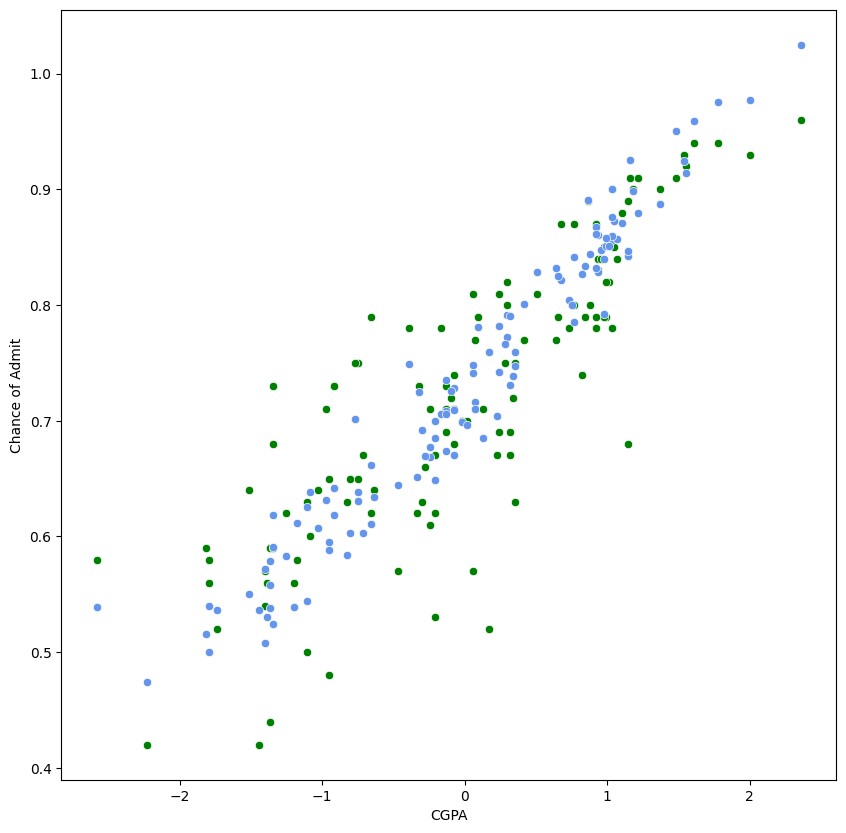

In [203]:
# scatterplot of test data:
plt.figure(figsize=(10,10))
sns.scatterplot(x=xtt_with_constant2['CGPA'],y=ytt,color='green')
sns.scatterplot(x=xtt_with_constant2['CGPA'],y=y_hat_p,color='cornflowerblue')
plt.show()

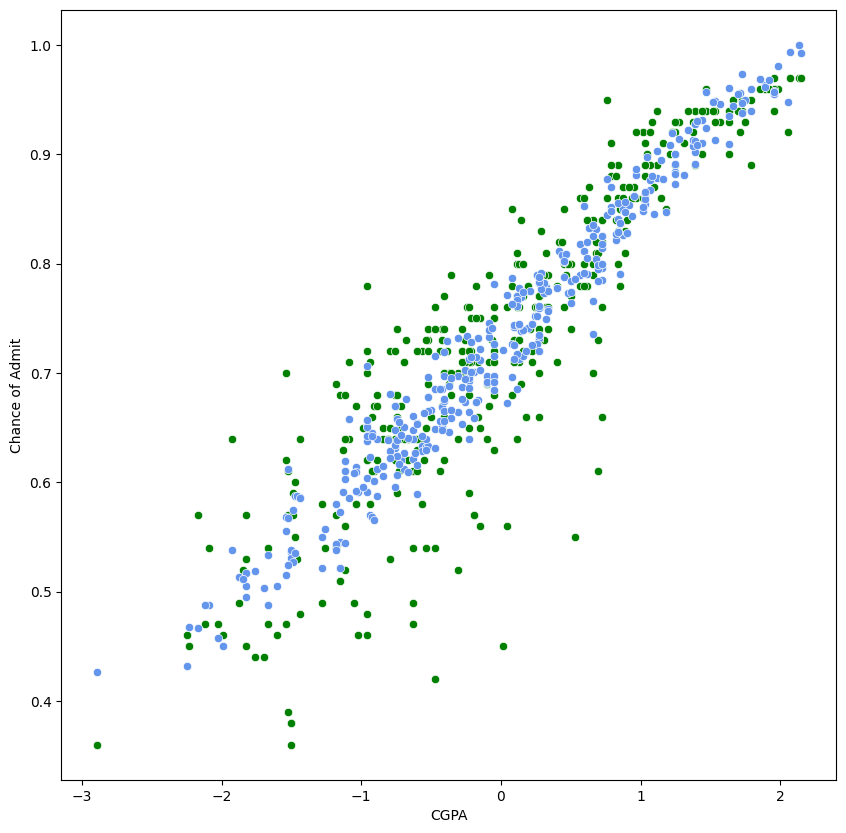

In [202]:
# Scatterplot of train data:
plt.figure(figsize=(10,10))
sns.scatterplot(x=xtn_with_constant2['CGPA'],y=ytn,color='green')
sns.scatterplot(x=xtn_with_constant2['CGPA'],y=y_hat,color='cornflowerblue')
plt.show()

In [219]:
# Model Summary:

Avg_MSE = np.sum((y_hat_p-ytt)**2)/(len(ytt))
R_square = lr_model2.rsquared
Adj_R_square = lr_model2.rsquared_adj
MAE = np.sum(np.abs(y_hat_p-ytt))/(len(ytt))

print('* '*30)
print()
print(f'Average mean square error of regression model is: {np.round(Avg_MSE,4)}')
print(f'R^2 of regression model is: {np.round(R_square,2)}')
print(f'Adjusted R^2 of regression model is: {np.round(Adj_R_square,2)}')
print(f'Mean absolute error of regression model is: {np.round(MAE,4)}')
print()
print('* '*30)

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

Average mean square error of regression model is: 0.0038
R^2 of regression model is: 0.83
Adjusted R^2 of regression model is: 0.83
Mean absolute error of regression model is: 0.0456

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


Summary of lineare regression model:

1. Data satisfies all the assumptions of lineare regression.
2. Rsquare of retrained model is 0.829 and adjusted Rsquare is 0.826 which shows model is performing well.
3. CGPA & GRE score have the highest weights which suggest that effect GRE score and CGPA on target vaiable(chances of admission) is more than other features. Research column has least weight which means that chances of admission is not much affected by research column.
